In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

In [42]:
df = pd.read_csv("data.csv")
df

,x0,x1,x2,t
0,10.00000,10.00000,10.0000,0.000
1,10.00000,10.17000,10.0733,0.001
2,10.00170,10.33910,10.1481,0.002
3,10.00510,10.50730,10.2244,0.003
4,10.01010,10.67460,10.3022,0.004
...,...,...,...,...
99996,4.74622,5.86077,20.3720,99.996
99997,4.75737,5.89111,20.3454,99.997
99998,4.76870,5.92164,20.3191,99.998
99999,4.78023,5.95235,20.2931,99.999


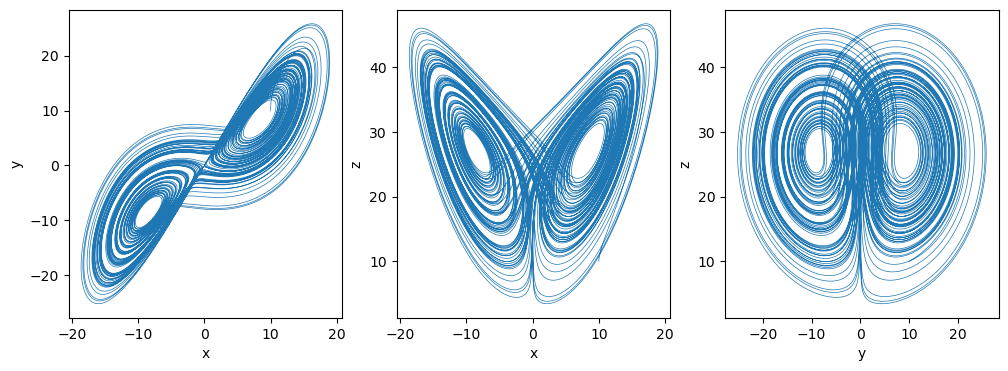

In [52]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax0 = ax[0].plot(df["x0"], df["x1"], lw=0.5)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax1 = ax[1].plot(df["x0"], df["x2"], lw=0.5)
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")

ax2 = ax[2].plot(df["x1"], df["x2"], lw=0.5)
ax[2].set_xlabel("y")
ax[2].set_ylabel("z")

fig.savefig("2D.png")

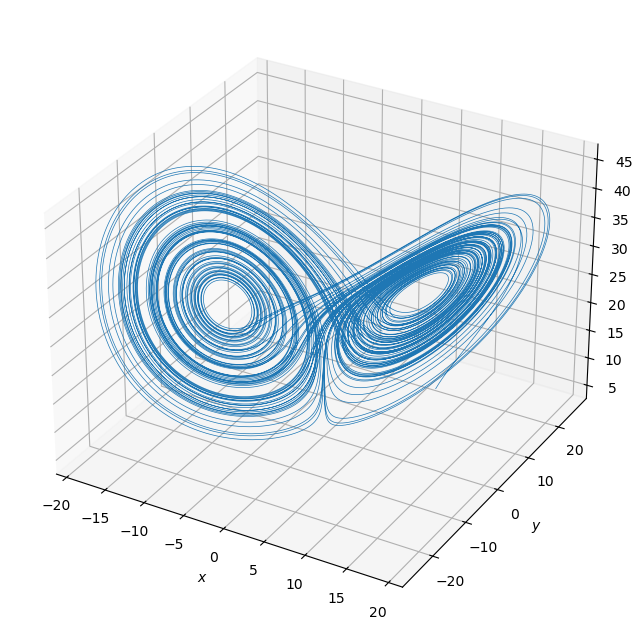

In [50]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection="3d")
ax.plot(df["x0"], df["x1"], df["x2"], lw=0.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")

fig.savefig("3D.png")

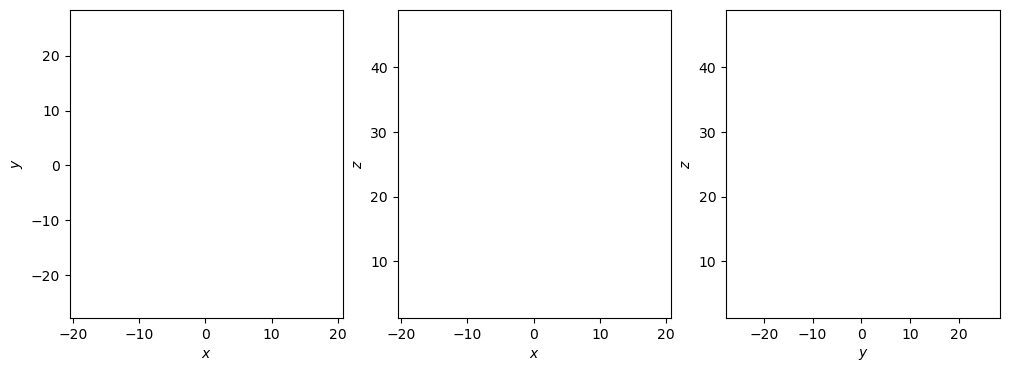

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax0 = ax[0].plot(df["x0"][0], df["x1"][0], lw=0.5)
ax[0].set_xlabel(r"$x$")
ax[0].set_ylabel(r"$y$")

ax1 = ax[1].plot(df["x0"][0], df["x2"][0], lw=0.5)
ax[1].set_xlabel(r"$x$")
ax[1].set_ylabel(r"$z$")

ax2 = ax[2].plot(df["x1"][0], df["x2"][0], lw=0.5)
ax[2].set_xlabel(r"$y$")
ax[2].set_ylabel(r"$z$")

frame_factor = 10
def update(frame):
    # for each frame, update the data stored on each artist.
    dfx = df["x0"][:(frame * frame_factor)]
    dfy = df["x1"][:(frame * frame_factor)]
    dfz = df["x2"][:(frame * frame_factor)]
    # update the plot:
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    ax0 = ax[0].plot(dfx, dfy, lw=0.5)
    ax[0].set_xlabel(r"$x$")
    ax[0].set_ylabel(r"$y$")
    ax1 = ax[1].plot(dfx, dfz, lw=0.5)
    ax[1].set_xlabel(r"$x$")
    ax[1].set_ylabel(r"$z$")
    ax2 = ax[2].plot(dfy, dfz, lw=0.5)
    ax[2].set_xlabel(r"$y$")
    ax[2].set_ylabel(r"$z$")
    return (ax0, ax1, ax2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=df.shape[0]//frame_factor, interval=1)
ani.save("animation.mp4", fps=60)